In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of species (classes): 200
Number of training images: 4829
Number of testing images: 1204


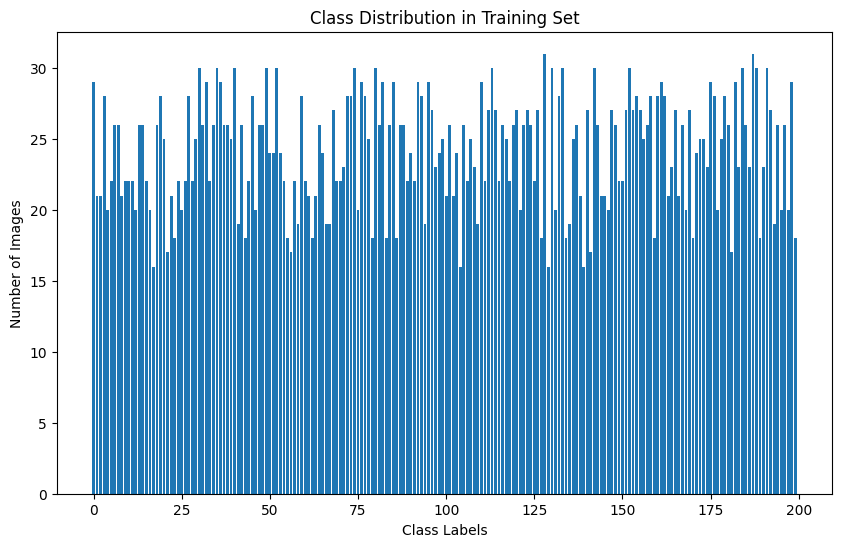

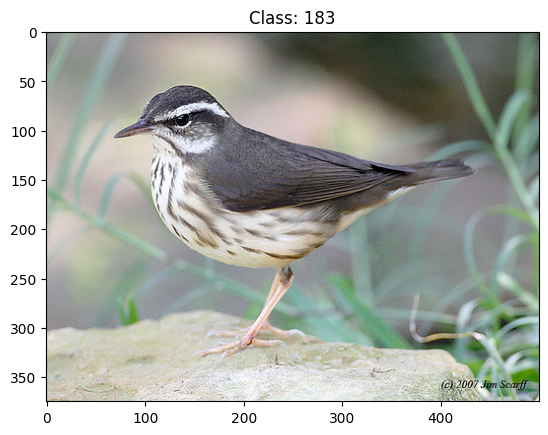

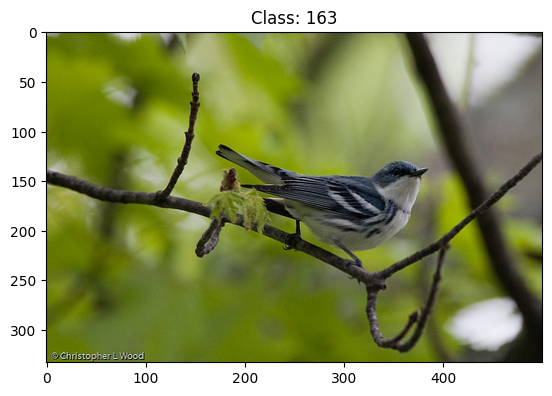

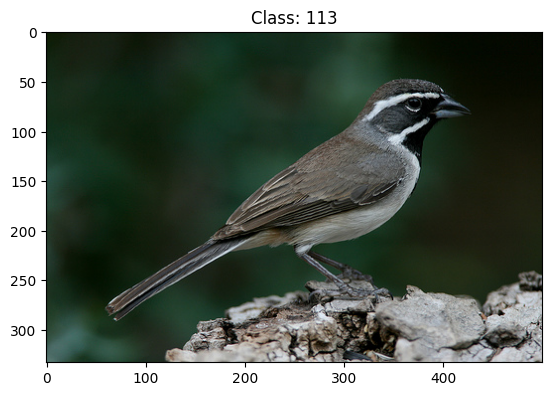

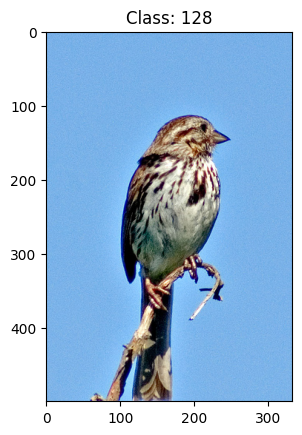

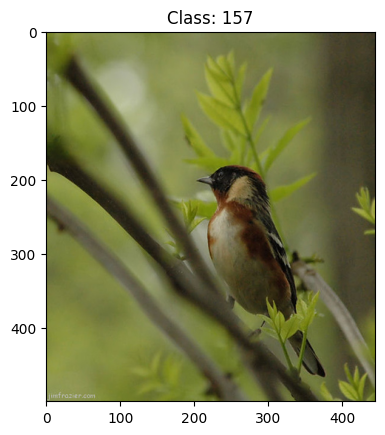

Class Imbalance: 
label
187    31
128    31
188    30
191    30
184    30
       ..
181    17
17     16
139    16
104    16
129    16
Name: count, Length: 200, dtype: int64
Number of training images after split: 3863
Number of validation images: 966


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from collections import Counter

# Define dataset path
root_dir = 'drive/MyDrive/COS30082'  # Update with actual path
train_annotation_file = os.path.join(root_dir, 'train.txt')
test_annotation_file = os.path.join(root_dir, 'test.txt')

# Load the metadata for training set
train_data = pd.read_csv(train_annotation_file, sep=' ', names=['filename', 'label'])
train_data['filepath'] = train_data['filename'].apply(lambda x: os.path.join(root_dir, 'train', x))

# Load the metadata for testing set
test_data = pd.read_csv(test_annotation_file, sep=' ', names=['filename', 'label'])
test_data['filepath'] = test_data['filename'].apply(lambda x: os.path.join(root_dir, 'test', x))

# Dataset Overview
num_classes = train_data['label'].nunique()
num_train_images = len(train_data)
num_test_images = len(test_data)

print(f"Number of species (classes): {num_classes}")
print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")

# Exploratory Data Analysis (EDA)


Image resolution statistics for 100 sampled images:
           width      height
count  100.00000  100.000000
mean   467.60000  402.510000
std     58.68457   73.795034
min    310.00000  256.000000
25%    472.75000  334.750000
50%    500.00000  377.500000
75%    500.00000  500.000000
max    500.00000  500.000000


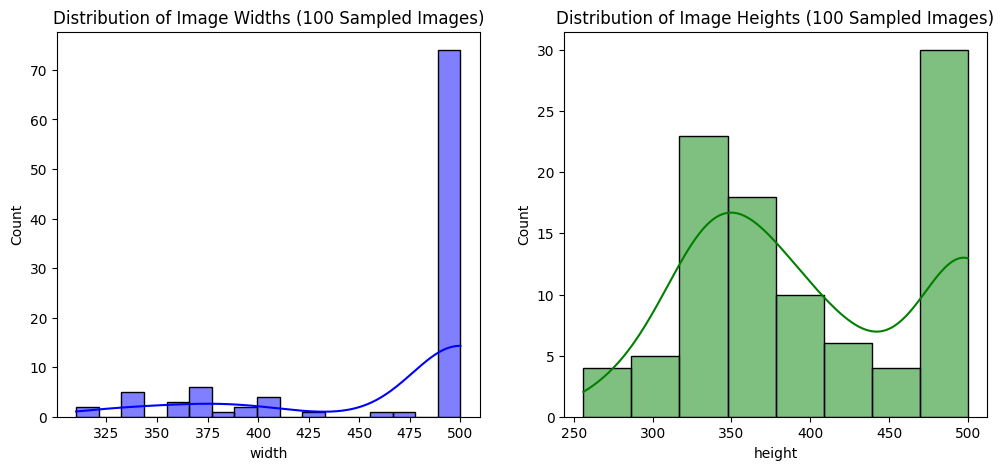

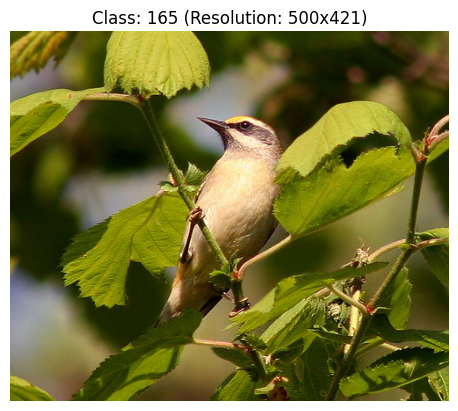

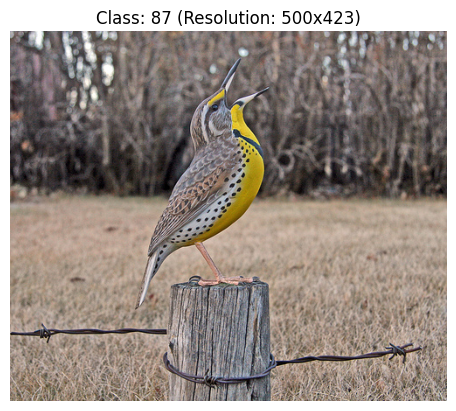

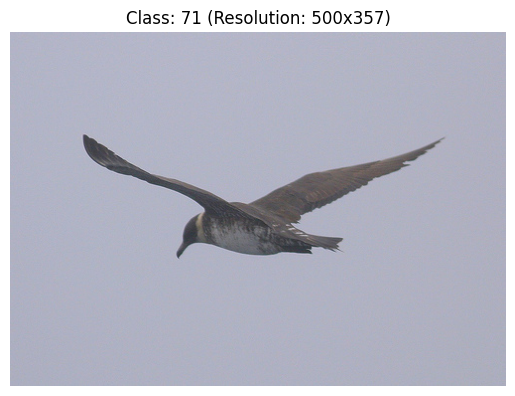

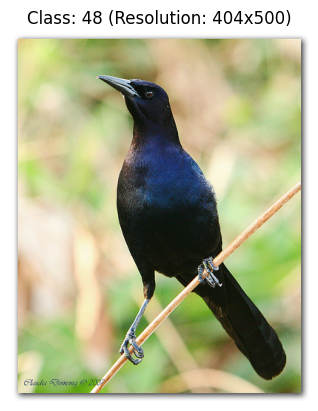

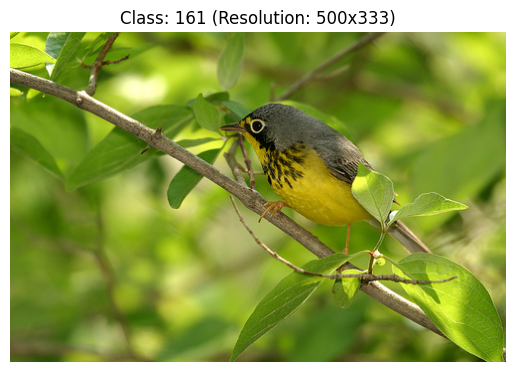

In [9]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_annotation_file = os.path.join('drive/MyDrive/COS30082', 'train.txt')  # Update path accordingly
train_img_dir = os.path.join('drive/MyDrive/COS30082', 'train')
train_data = pd.read_csv(train_annotation_file, sep=' ', names=['filename', 'label'])

# Sample 100 images randomly from the dataset
sampled_data = train_data.sample(n=100, random_state=42)

# Function to get image properties like resolution (width and height) for 100 sampled images
def get_image_properties(row):
    img_path = os.path.join(train_img_dir, row['filename'])
    with Image.open(img_path) as img:
        width, height = img.size
    return pd.Series([width, height])

# Apply function to get resolution of the sampled images
sampled_data[['width', 'height']] = sampled_data.apply(get_image_properties, axis=1)

# 1. Resolution Variability: Show resolution statistics and distribution for 100 sampled images
print("Image resolution statistics for 100 sampled images:")
print(sampled_data[['width', 'height']].describe())

# Plot distribution of image resolutions (width and height) for 100 sampled images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(sampled_data['width'], kde=True, color='blue')
plt.title('Distribution of Image Widths (100 Sampled Images)')

plt.subplot(1, 2, 2)
sns.histplot(sampled_data['height'], kde=True, color='green')
plt.title('Distribution of Image Heights (100 Sampled Images)')

plt.show()

# 2. Display some of the sampled images to show complex backgrounds and occlusions
sample_images = sampled_data.sample(5)  # Randomly sample 5 images from the 100 sampled images
for idx, row in sample_images.iterrows():
    img_path = os.path.join(train_img_dir, row['filename'])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f"Class: {row['label']} (Resolution: {img.size[0]}x{img.size[1]})")
    plt.axis('off')
    plt.show()


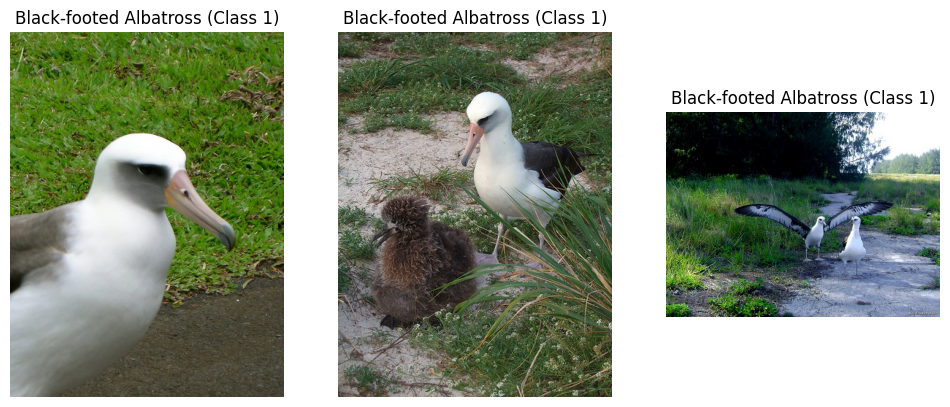

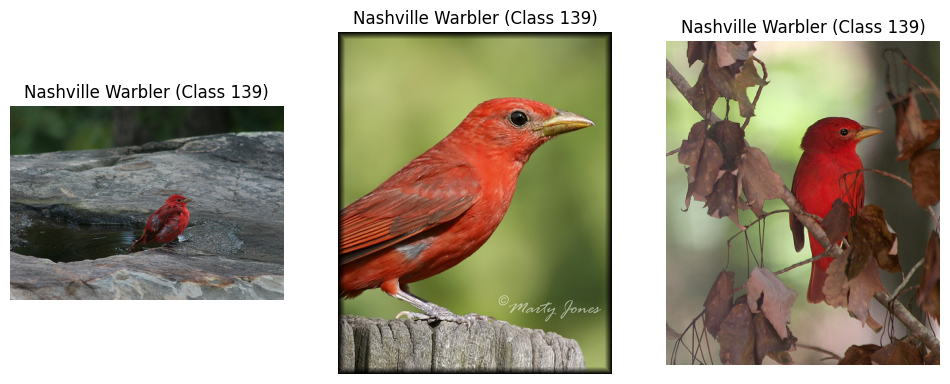

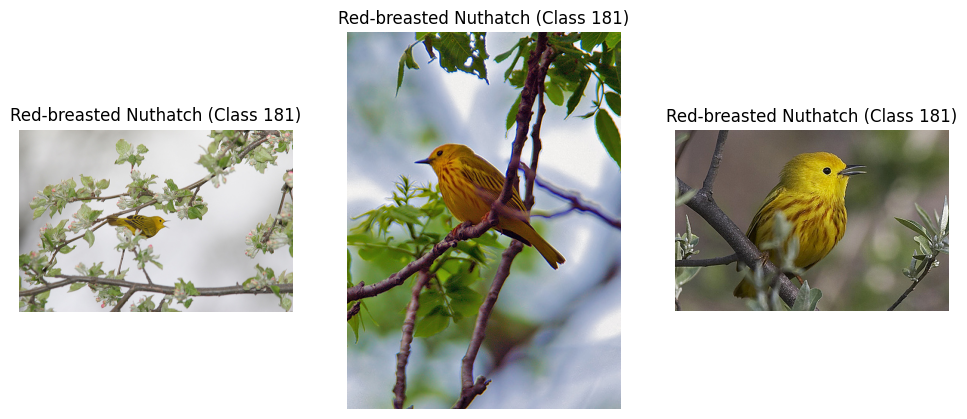

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load the dataset and assign paths
train_annotation_file = os.path.join('drive/MyDrive/COS30082', 'train.txt')  # Update path accordingly
train_img_dir = os.path.join('drive/MyDrive/COS30082', 'train')
train_data = pd.read_csv(train_annotation_file, sep=' ', names=['filename', 'label'])

# Define a function to display sample images from specific classes
def display_sample_images(class_label, class_name, num_samples=3):
    class_data = train_data[train_data['label'] == class_label].sample(n=num_samples)

    plt.figure(figsize=(12, 6))
    for idx, row in enumerate(class_data.itertuples(), 1):
        img_path = os.path.join(train_img_dir, row.filename)
        img = Image.open(img_path)

        # Display the image
        plt.subplot(1, num_samples, idx)
        plt.imshow(img)
        plt.title(f"{class_name} (Class {class_label})")
        plt.axis('off')
    plt.show()

# Display images for the classes with known background and occlusion challenges
# Class 1: Black-footed Albatross (Ocean backgrounds)
display_sample_images(1, 'Black-footed Albatross')

# Class 139: Nashville Warbler (Dense foliage)
display_sample_images(139, 'Nashville Warbler')

# Class 181: Red-breasted Nuthatch (Trees, occlusion by branches)
display_sample_images(181, 'Red-breasted Nuthatch')


In [3]:

# Display the first few rows of the training annotation file to show the structure
print("Structure of the annotation file:")
print(train_data.head())

# Show an example of the format: image name and class label
for idx, row in train_data.head(5).iterrows():
    print(f"Image: {row['filename']}, Class Label: {row['label']}")

Structure of the annotation file:
                                     filename  label  \
0  Black_footed_Albatross_0004_2731401028.jpg      0   
1  Black_footed_Albatross_0008_1384283201.jpg      0   
2   Black_footed_Albatross_0011_820118444.jpg      0   
3  Black_footed_Albatross_0003_2981373810.jpg      0   
4  Black_footed_Albatross_0021_2443213385.jpg      0   

                                            filepath  
0  drive/MyDrive/COS30082/train/Black_footed_Alba...  
1  drive/MyDrive/COS30082/train/Black_footed_Alba...  
2  drive/MyDrive/COS30082/train/Black_footed_Alba...  
3  drive/MyDrive/COS30082/train/Black_footed_Alba...  
4  drive/MyDrive/COS30082/train/Black_footed_Alba...  
Image: Black_footed_Albatross_0004_2731401028.jpg, Class Label: 0
Image: Black_footed_Albatross_0008_1384283201.jpg, Class Label: 0
Image: Black_footed_Albatross_0011_820118444.jpg, Class Label: 0
Image: Black_footed_Albatross_0003_2981373810.jpg, Class Label: 0
Image: Black_footed_Albatross_0021_2